# sampley exemplar: Stage 2
Before going through this exemplar, please consult the Introduction to sampley exemplars (```intro.ipynb```).
<br>This exemplar illustrates the classes that can be made in Stage 2, their class methods, their attributes, and their methods. 

## Setup

### Import the package

In [1]:
from sampley import *

### Set the input folder
To run this exemplar, download the mock data files, put them in a folder, and set the path to the folder below.

In [2]:
input_folder = './input/'

### Set the output folder
To run this exemplar, make a folder to save the outputs in and set the path to the folder below.

In [3]:
output_folder = './output/'

### Make DataPoints and Sections objects (Stage 1)
Before making any objects in Stage 2, we, of course, have to conduct Stage 1. For the sake of this exemplar, we make one ```Sections``` and one ```DataPoints``` object below that are then used to make all the subsequent delimiters. See the Stage 1 exemplar and the User Manual for more details.

In [4]:
u_sightings = DataPoints.from_file(
    filepath=input_folder+'sightings.gpkg',
    crs_working='EPSG:32619',
    datetime_col='datetime',
    tz_input='UTC-05:00'
)

Success: file opened.
Success: reprojected to CRS "EPSG:32619"
Success: column "datetime" reformatted to datetimes.
Success: timezone of column "datetime" set to "UTC-05:00".
Success: datapoint IDs generated.


In [5]:
u_sections = Sections.from_file(
    filepath=input_folder+'sections.gpkg',
    crs_working='EPSG:32619',
    datetime_col='datetime_beg',
    tz_input='UTC-05:00'
)

Success: file opened.
Success: reprojected to CRS "EPSG:32619"
Success: column "datetime_beg" reformatted to datetimes.
Success: timezone of column "datetime_beg" set to "UTC-05:00".
Note: column "datetime_beg" renamed to "datetime".
Success: section IDs generated.


## Periods

### Make a ```Periods``` object...
We can make a ```Periods``` object with the ```Periods.delimit()``` class method. In practice, the first is the most likely to be used.
<br>There are two options for the parameter ```extent```, illustrated in the two examples below.

Firstly, we can make a ```Periods``` object from a ```DataPoints``` or ```Sections``` object.
<br>In this example, we use the ```Sections``` object that we made before.

In [6]:
u_periods = Periods.delimit(
    extent=u_sections,
    unit='day',
    num=8)

Secondly, we can make a ```Periods``` object from a tuple containing two elements:
- a list of two dates/datetimes marking the beginning and end of the study, respectively
- the timezone of the dates/datetimes

In [7]:
u_periods = Periods.delimit(
    extent=(['2019-01-25 10:18:13', '2019-03-03 14:32:57'], 'UTC-05:00'),
    unit='day',
    num=8)

Success: column "datetime" reformatted to datetimes.
Success: timezone of column "datetime" set to "UTC-05:00".


### Access a ```Periods``` object's attributes
A ```Periods``` object, regardless of how it was made, will have three attributes (```name```, ```parameters```, and ```periods```) that we can access as follows.

In [8]:
u_periods.name

'periods-8d'

In [9]:
u_periods.parameters

{'periods_tz': 'UTC-05:00',
 'periods_extent': '2019-01-25-2019-03-05',
 'periods_extent_source': 'tuple',
 'periods_number': 8,
 'periods_unit': 'day'}

In [10]:
u_periods.periods

period_id                  date_beg                  date_mid  \
0  p2019-01-25-8d 2019-01-25 00:00:00-05:00 2019-01-29 00:00:00-05:00   
1  p2019-02-02-8d 2019-02-02 00:00:00-05:00 2019-02-06 00:00:00-05:00   
2  p2019-02-10-8d 2019-02-10 00:00:00-05:00 2019-02-14 00:00:00-05:00   
3  p2019-02-18-8d 2019-02-18 00:00:00-05:00 2019-02-22 00:00:00-05:00   
4  p2019-02-26-8d 2019-02-26 00:00:00-05:00 2019-03-02 00:00:00-05:00   

                   date_end  
0 2019-02-01 00:00:00-05:00  
1 2019-02-09 00:00:00-05:00  
2 2019-02-17 00:00:00-05:00  
3 2019-02-25 00:00:00-05:00  
4 2019-03-05 00:00:00-05:00

### Save a ```Periods``` object
```Periods``` objects have an inbuilt ```save``` method to save the periods as a CSV.

In [11]:
u_periods.save(folder=output_folder)

## Cells

### Make a ```Cells``` object...
We can make a ```Cells``` object with the ```Cells.delimit()``` class method.
<br>There are three options for the parameter ```extent```, illustrated in the three examples below. In practice, the first two are the most likely to be used.

Firstly, we can make a ```Cells``` object from a ```DataPoints``` or ```Sections``` object.
<br>In this example, we use the ```Sections``` object that we made before.

In [12]:
u_cells = Cells.delimit(
    extent=u_sections,
    var='hexagonal',
    side=5000,
    buffer=2000)

Secondly, we can make a ```Cells``` object from a GeoPackage or Shapefile by, first, inputting it as a ```GeoDataFrame``` with the GeoPandas ```gpd.read_file()``` function and, then, using the ```GeoDataFrame``` as the extent. The GeoPackage or Shapefile could represent, for example, the study area covered by the surveys.
<br>In this example, we use a file called ```study_area.gpkg``` which is a simple rectangle , however, the shape could be more complex.

In [13]:
import geopandas as gpd  # import geopandas package
study_area = gpd.read_file(input_folder + 'study_area.gpkg')  # input the GeoPackage as a GeoDataFrame
u_cells = Cells.delimit(
    extent=study_area,
    var='hexagonal',
    side=5000,
    buffer=2000)

Finally, we can also make a ```Cells``` object from a tuple containing two elements:
- a list of four coordinates marking the x min, y min, x max, y max of the study area respectively
- the CRS of the coordinates

In [14]:
from pyproj import CRS
u_cells = Cells.delimit(
    extent=([500095.61955057, 4696798.08683991, 657711.42048071, 4751214.73038492], CRS('EPSG:32619')),
    var='hexagonal',
    side=5000,
    buffer=2000)

### Access a ```Cells``` object's attributes
A ```Cells``` object, regardless of how it was made, will have three attributes (```name```, ```parameters```, and ```cells```) that we can access as follows.

In [15]:
u_cells.name

'cells-h5000m'

In [16]:
u_cells.parameters

{'cells_crs': 'EPSG:32619',
 'cells_extent': '493765.4925316478, 4689798.08683991, 671300.7003074577, 4759798.08683991',
 'cells_extent_source': 'tuple',
 'cells_var': 'hexagonal',
 'cells_side': 5000,
 'cells_unit': 'metre',
 'cells_buffer': 2000}

In [17]:
u_cells.cells

cell_id                                            polygon  \
0    c001-h5000m  POLYGON ((498095.62 4699798.087, 502425.747 46...   
1    c002-h5000m  POLYGON ((506755.874 4699798.087, 511086.001 4...   
2    c003-h5000m  POLYGON ((515416.128 4699798.087, 519746.255 4...   
3    c004-h5000m  POLYGON ((524076.382 4699798.087, 528406.509 4...   
4    c005-h5000m  POLYGON ((532736.636 4699798.087, 537066.763 4...   
..           ...                                                ...   
175  c176-h5000m  POLYGON ((627999.43 4759798.087, 632329.557 47...   
176  c177-h5000m  POLYGON ((636659.684 4759798.087, 640989.811 4...   
177  c178-h5000m  POLYGON ((645319.938 4759798.087, 649650.065 4...   
178  c179-h5000m  POLYGON ((653980.192 4759798.087, 658310.319 4...   
179  c180-h5000m  POLYGON ((662640.446 4759798.087, 666970.573 4...   

                           centroid  
0     POINT (498095.62 4694798.087)  
1    POINT (506755.874 4694798.087)  
2    POINT (515416.128 4694798.087)  
3    POINT (524076.382 4694798.087)  
4    POINT (532736.636 4694798.087)  
..                              ...  
175   POINT (627999.43 4754798.087)  
176  POINT (636659.684 4754798.087)  
177  POINT (645319.938 4754798.087)  
178  POINT (653980.192 4754798.087)  
179  POINT (662640.446 4754798.087)  

[180 rows x 3 columns]

### Plot a ```Cells``` object
```Cells``` objects have an inbuilt ```plot``` method to make a simple plot.

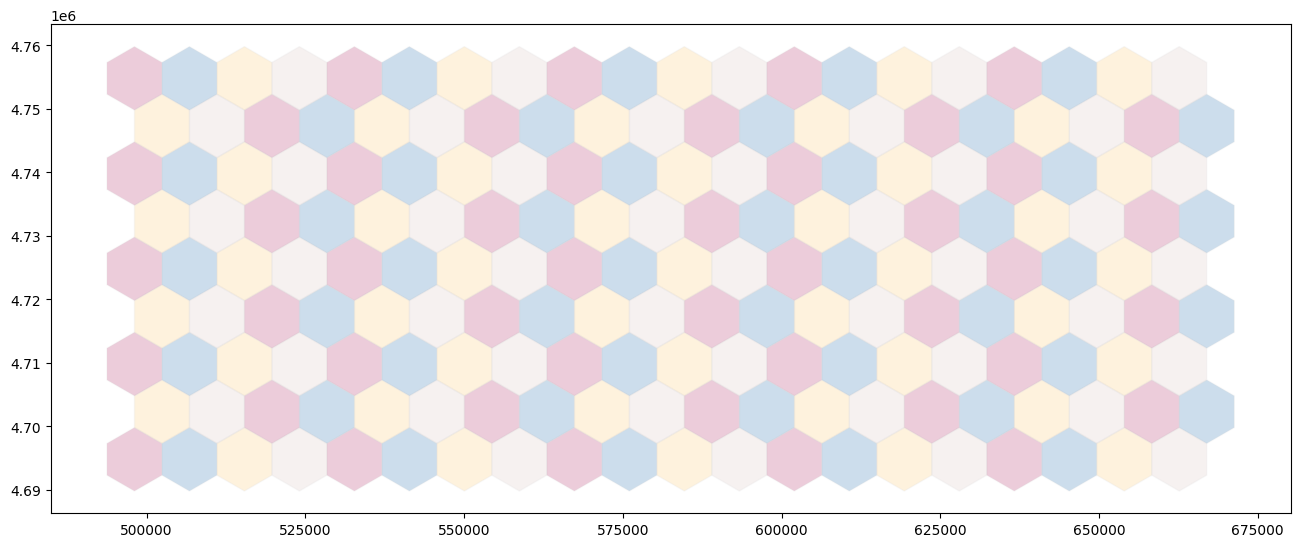

In [18]:
u_cells.plot()

### Save a ```Cells``` object
```Cells``` objects have an inbuilt ```save``` method to save the cells as a GPKG.

In [19]:
u_cells.save(folder=output_folder)

## Segments

### Make a ```Segments``` object...
We can make a ```Segments``` object from a ```Sections``` object with the ```Segments.delimit()``` class method.

In [20]:
u_segments = Segments.delimit(
    sections=u_sections,
    var='simple',
    target=10000,
    rand=True)

### Access a ```Segments``` object's attributes
A ```Segments``` object, regardless of how it was made, will have three attributes (```name```, ```parameters```, and ```segments```) that we can access as follows.

In [21]:
u_segments.name

'segments-s10000m'

In [22]:
u_segments.parameters

{'sections_name': 'sections-sections',
 'segments_crs': 'EPSG:32619',
 'segments_var': 'simple',
 'segments_rand': True,
 'segments_target': 10000,
 'segments_unit': 'metre'}

In [23]:
u_segments.segments

segment_id                                               line  \
0   s01-s10000m  LINESTRING (580092.757 4742883.408, 579997.135...   
1   s02-s10000m  LINESTRING (570094.222 4742829.916, 569917.081...   
2   s03-s10000m  LINESTRING (560095.148 4742773.163, 559864.339...   
3   s04-s10000m  LINESTRING (550095.667 4742710.935, 549838.842...   
4   s05-s10000m  LINESTRING (540095.882 4742645.456, 539704.822...   
..          ...                                                ...   
68  s69-s10000m  LINESTRING (652338.76 4697682.02, 652197.878 4...   
69  s70-s10000m  LINESTRING (642341.15 4697526.723, 641994.147 ...   
70  s71-s10000m  LINESTRING (632343.125 4697349.07, 632326.134 ...   
71  s72-s10000m  LINESTRING (622345.629 4697147.973, 622000.67 ...   
72  s73-s10000m  LINESTRING (612347.04 4696980.054, 612333.116 ...   

                          midpoint        date section_id     dfbsec_beg  \
0   POINT (575093.311 4742845.962)  2019-01-25         s1       0.000000   
1    POINT (565094.73 4742799.725)  2019-01-25         s1   10000.000000   
2   POINT (555095.521 4742749.119)  2019-01-25         s1   20000.000000   
3   POINT (545095.787 4742676.383)  2019-01-25         s1   30000.000000   
4   POINT (535096.832 4742648.569)  2019-01-25         s1   40000.000000   
..                             ...         ...        ...            ...   
68  POINT (647339.987 4697611.472)  2019-02-05         s4  274105.324868   
69  POINT (637342.194 4697445.552)  2019-02-05         s4  284105.324868   
70  POINT (627344.065 4697254.461)  2019-02-05         s4  294105.324868   
71  POINT (617346.364 4697062.225)  2019-02-05         s4  304105.324868   
72  POINT (607348.392 4696882.591)  2019-02-05         s4  314105.324868   

       dfbsec_end  
0    10000.000000  
1    20000.000000  
2    30000.000000  
3    40000.000000  
4    50000.000000  
..            ...  
68  284105.324868  
69  294105.324868  
70  304105.324868  
71  314105.324868  
72  324105.324868  

[73 rows x 7 columns]

### Plot a ```Segments``` object
```Segments``` objects have an inbuilt ```plot``` method to make a simple plot.

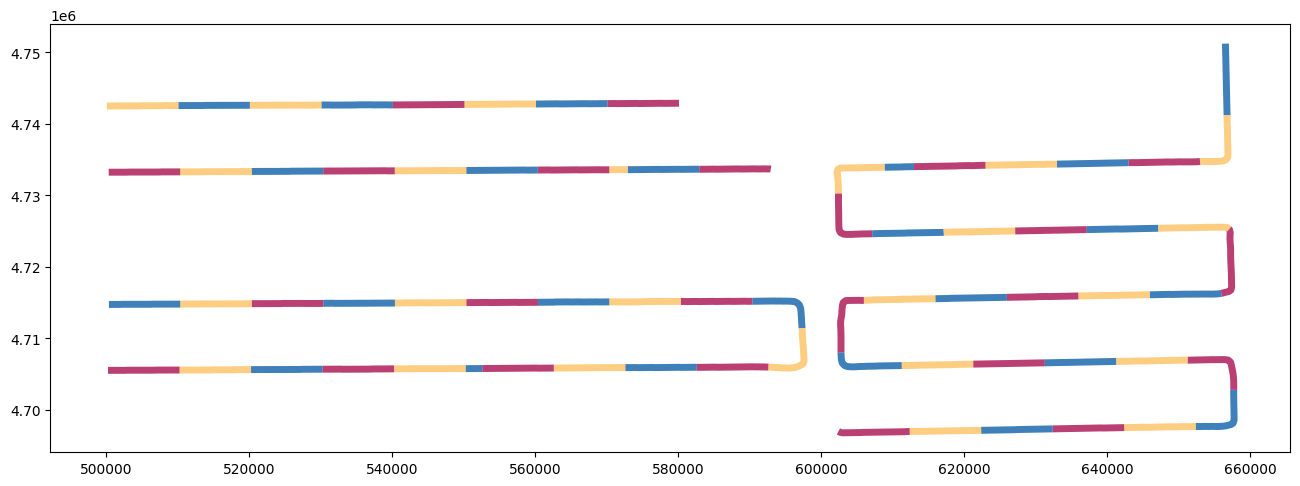

In [24]:
u_segments.plot()

### Save a ```Segments``` object
```Segments``` objects have an inbuilt ```save``` method to save the segments as a GPKG.

In [25]:
u_segments.save(folder=output_folder)

## Presences

### Make a ```Presences``` object...
We can make a ```Presences``` object from a ```DataPoints``` object with the ```Presences.delimit()``` class method.

In [26]:
u_presences = Presences.delimit(
    datapoints=u_sightings,
    presence_col='individuals')

### Access a ```Presences``` object's attributes
A ```Presences``` object, regardless of how it was made, will have three attributes (```name```, ```parameters```, and ```presences```). We can access the attributes as follows.

In [27]:
u_presences.name

'presences-sightings'

In [28]:
u_presences.parameters

{'presences_crs': 'EPSG:32619'}

In [29]:
u_presences.presences

point_id                           point       date datapoint_id
0       p01   POINT (579166.78 4742872.701) 2019-01-25          d01
1       p02  POINT (554184.217 4742741.886) 2019-01-25          d02
2       p03  POINT (548599.876 4742700.214) 2019-01-25          d03
3       p04  POINT (520909.741 4714855.058) 2019-02-02          d04
4       p05  POINT (532548.249 4714899.835) 2019-02-02          d05
5       p06  POINT (512817.407 4705582.465) 2019-02-02          d06
6       p07   POINT (504710.41 4705553.392) 2019-02-02          d07
7       p08  POINT (654449.136 4716189.584) 2019-02-05          d08
8       p09  POINT (645666.237 4716110.937) 2019-02-05          d09
9       p10   POINT (643532.681 4716066.52) 2019-02-05          d10
10      p11  POINT (629124.489 4706545.106) 2019-02-05          d11
11      p12  POINT (620560.818 4697116.949) 2019-02-05          d12
12      p13  POINT (611976.857 4696974.111) 2019-02-05          d13

### Plot a ```Presences``` object
```Presences``` objects have an inbuilt ```plot``` method to make a simple plot.

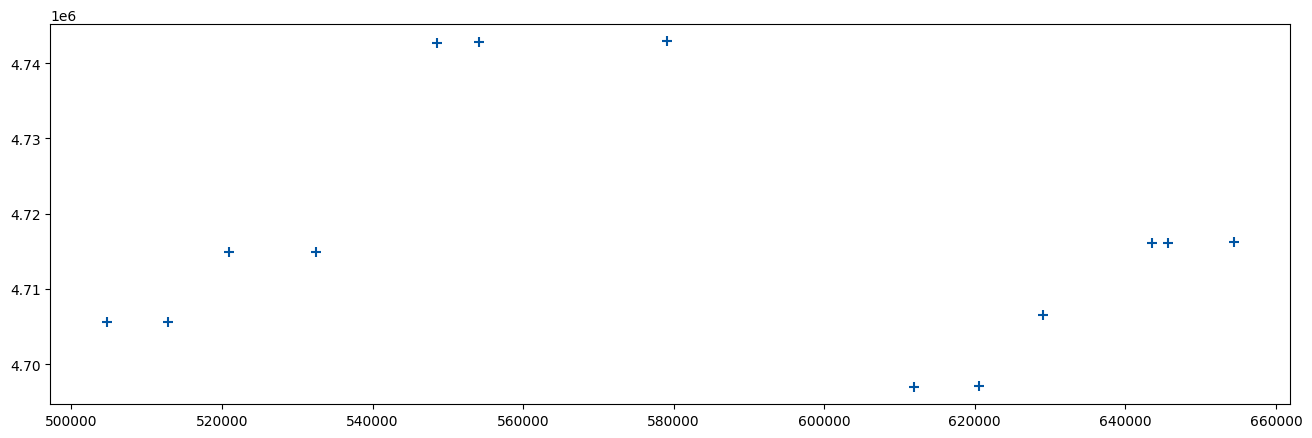

In [30]:
u_presences.plot()

### Save a ```Presences``` object
```Presences``` objects have an inbuilt ```save``` method to save the presences as a GPKG.

In [31]:
u_presences.save(folder=output_folder)

## PresenceZones
Please note: the Presences section of this notebook must be run before running this section

### Make a ```PresenceZones``` object...
We can make a ```PresenceZones``` object from a ```Sections``` object and a ```Presences``` object with the ```PresenceZones.delimit()``` class method.

In [32]:
u_presencezones = PresenceZones.delimit(
    sections=u_sections,
    presences=u_presences,
    sp_threshold=10000,
    tm_threshold=5,
    tm_unit='day',
)

### Access a ```PresenceZones``` object's attributes
A ```PresenceZones``` object, regardless of how it was made, will have three attributes (```name```, ```parameters```, and ```presencezones```) that we can access as follows.

In [33]:
u_presencezones.name

'presencezones-10000m-5day'

In [34]:
u_presencezones.parameters

{'presencezones_crs': 'EPSG:32619',
 'presencezones_sp_threshold': 10000,
 'presencezones_tm_threshold': 5,
 'presencezones_tm_unit': 'day'}

In [35]:
u_presencezones.presencezones

section_id                                      presencezones
0         s1  MULTIPOLYGON (((550550.779 4732892.362, 549580...
1         s2                                               None
2         s3  MULTIPOLYGON (((613927.76 4687166.258, 612957....
3         s4  MULTIPOLYGON (((613927.76 4687166.258, 612957....

### Plot a ```PresenceZones``` object
```PresenceZones``` objects have an inbuilt ```plot``` method to make a simple plot.

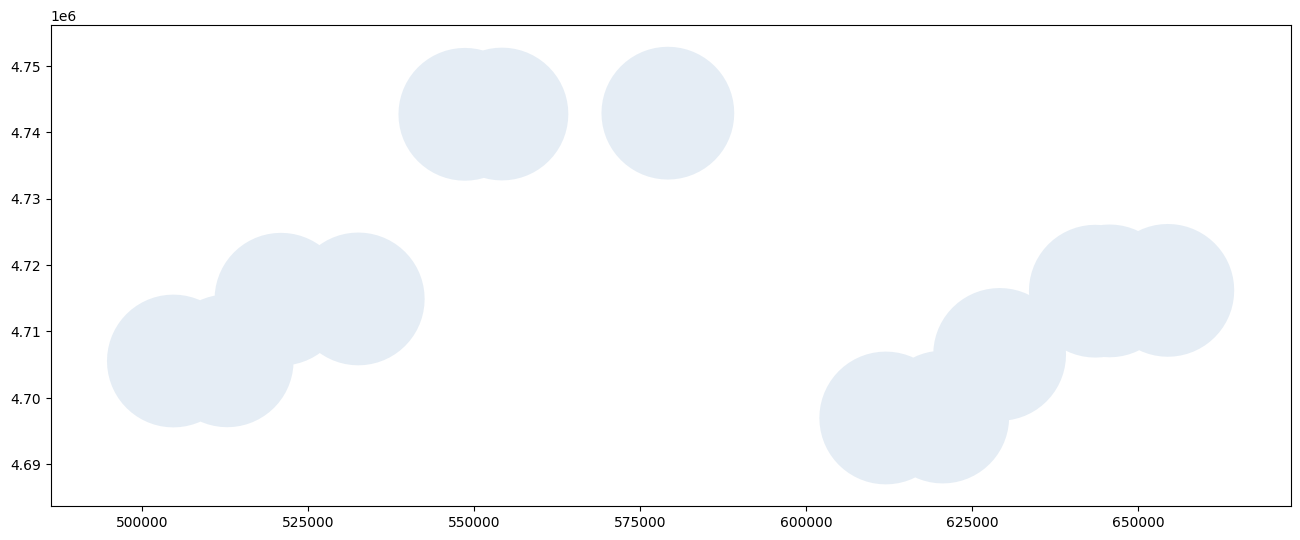

In [36]:
u_presencezones.plot()

### Save a ```PresenceZones``` object
```PresenceZones``` objects have an inbuilt ```save``` method to save the presence zones as a GPKG.

In [37]:
u_presencezones.save(folder=output_folder)

## Absences
Please note: the PresenceZones sections of this notebook must be run before running this section

### Make an ```Absences``` object...
We can make an ```Absences``` object from a ```Sections``` object and a ```PresenceZones``` object with the ```Absences.delimit()``` class method.

In [38]:
u_absences = Absences.delimit(
    sections=u_sections,
    presencezones=u_presencezones,
    var='along',
    target=20)

Target: 20 | Attempts: 30 | Successes: 20


### Access an ```Absences``` object's attributes
An ```Absences``` object, regardless of how it was made, will have three attributes (```name```, ```parameters```, and ```absences```). We can access the attributes as follows.

In [39]:
u_absences.name

'absences-as-10000m-5day'

In [40]:
u_absences.parameters

{'absences_var': 'along',
 'absences_target': 20,
 'presencezones_crs': 'EPSG:32619',
 'presencezones_sp_threshold': 10000,
 'presencezones_tm_threshold': 5,
 'presencezones_tm_unit': 'day'}

In [41]:
u_absences.absences

point_id                           point       date section_id  \
0       a01    POINT (530307.11 4742633.18) 2019-01-25         s1   
1       a02  POINT (519468.796 4742594.012) 2019-01-25         s1   
2       a03  POINT (549844.012 4715002.398) 2019-02-02         s3   
3       a04  POINT (564322.028 4715103.592) 2019-02-02         s3   
4       a05  POINT (567746.845 4715098.387) 2019-02-02         s3   
5       a06  POINT (588723.459 4706005.649) 2019-02-02         s3   
6       a07   POINT (586180.602 4705973.73) 2019-02-02         s3   
7       a08    POINT (553918.64 4705798.18) 2019-02-02         s3   
8       a09  POINT (547653.126 4705770.276) 2019-02-02         s3   
9       a10  POINT (621274.478 4734154.672) 2019-02-05         s4   
10      a11  POINT (616101.709 4734065.773) 2019-02-05         s4   
11      a12  POINT (613776.275 4724771.165) 2019-02-05         s4   
12      a13  POINT (609569.476 4715428.888) 2019-02-05         s4   
13      a14  POINT (604320.678 4715311.434) 2019-02-05         s4   
14      a15   POINT (582653.876 4733658.91) 2019-03-03         s2   
15      a16   POINT (551711.473 4733487.87) 2019-03-03         s2   
16      a17   POINT (544512.28 4733455.492) 2019-03-03         s2   
17      a18  POINT (532768.676 4733408.672) 2019-03-03         s2   
18      a19  POINT (532536.844 4733407.576) 2019-03-03         s2   
19      a20  POINT (502981.826 4733246.659) 2019-03-03         s2   

             dfbs  
0    49790.459801  
1    60629.709225  
2   222053.675246  
3   236533.343525  
4   239958.841985  
5   286450.119801  
6   288993.177147  
7   321258.856329  
8   327524.853549  
9   426597.980750  
10  431772.645550  
11  465690.791093  
12  565399.331799  
13  570651.335530  
14   90281.385999  
15  121226.633386  
16  128426.249146  
17  140170.351876  
18  140402.187248  
19  169960.210010

### Plot an ```Absences``` object
```Absences``` objects have an inbuilt ```plot``` method to make a simple plot.

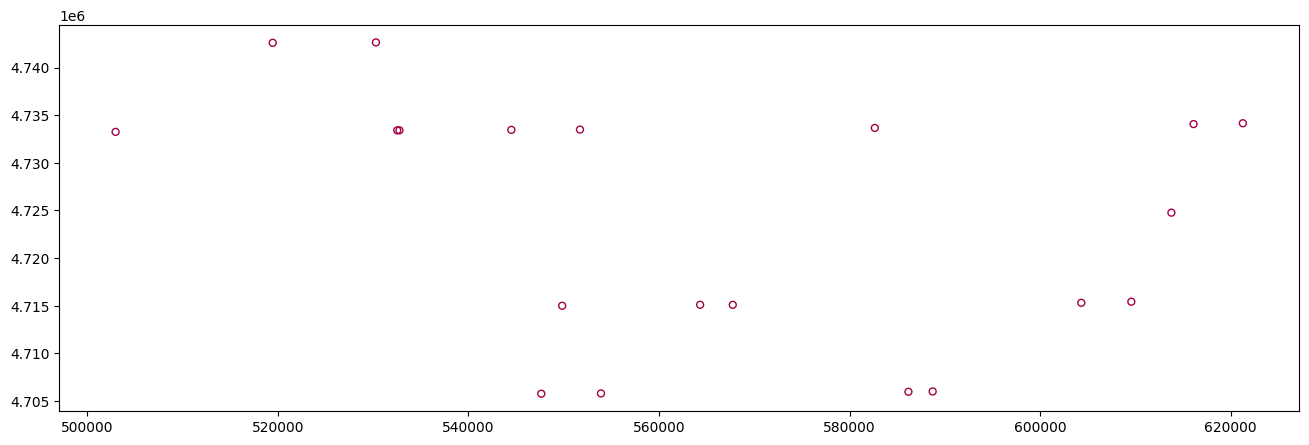

In [42]:
u_absences.plot()

### Save an ```Absences``` object
```Absences``` objects have an inbuilt ```save``` method to save the absences as a GPKG.

In [43]:
u_absences.save(folder=output_folder)